In [244]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import seaborn as sns

## matplotlib 그래프에서 한글 깨짐 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [4]:
## 제공 데이터 불러오기
df = pd.read_excel('/Users/andrew/hongsu/data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])[:2891]  # 이후부터는 유입량이 없는 데이터
df.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in df.columns.values]

In [26]:
mySeries=[]
for i in range(1,26):
    flood = df['유입량'][cnts[i-1]:cnts[i]]
    mySeries.append(flood)

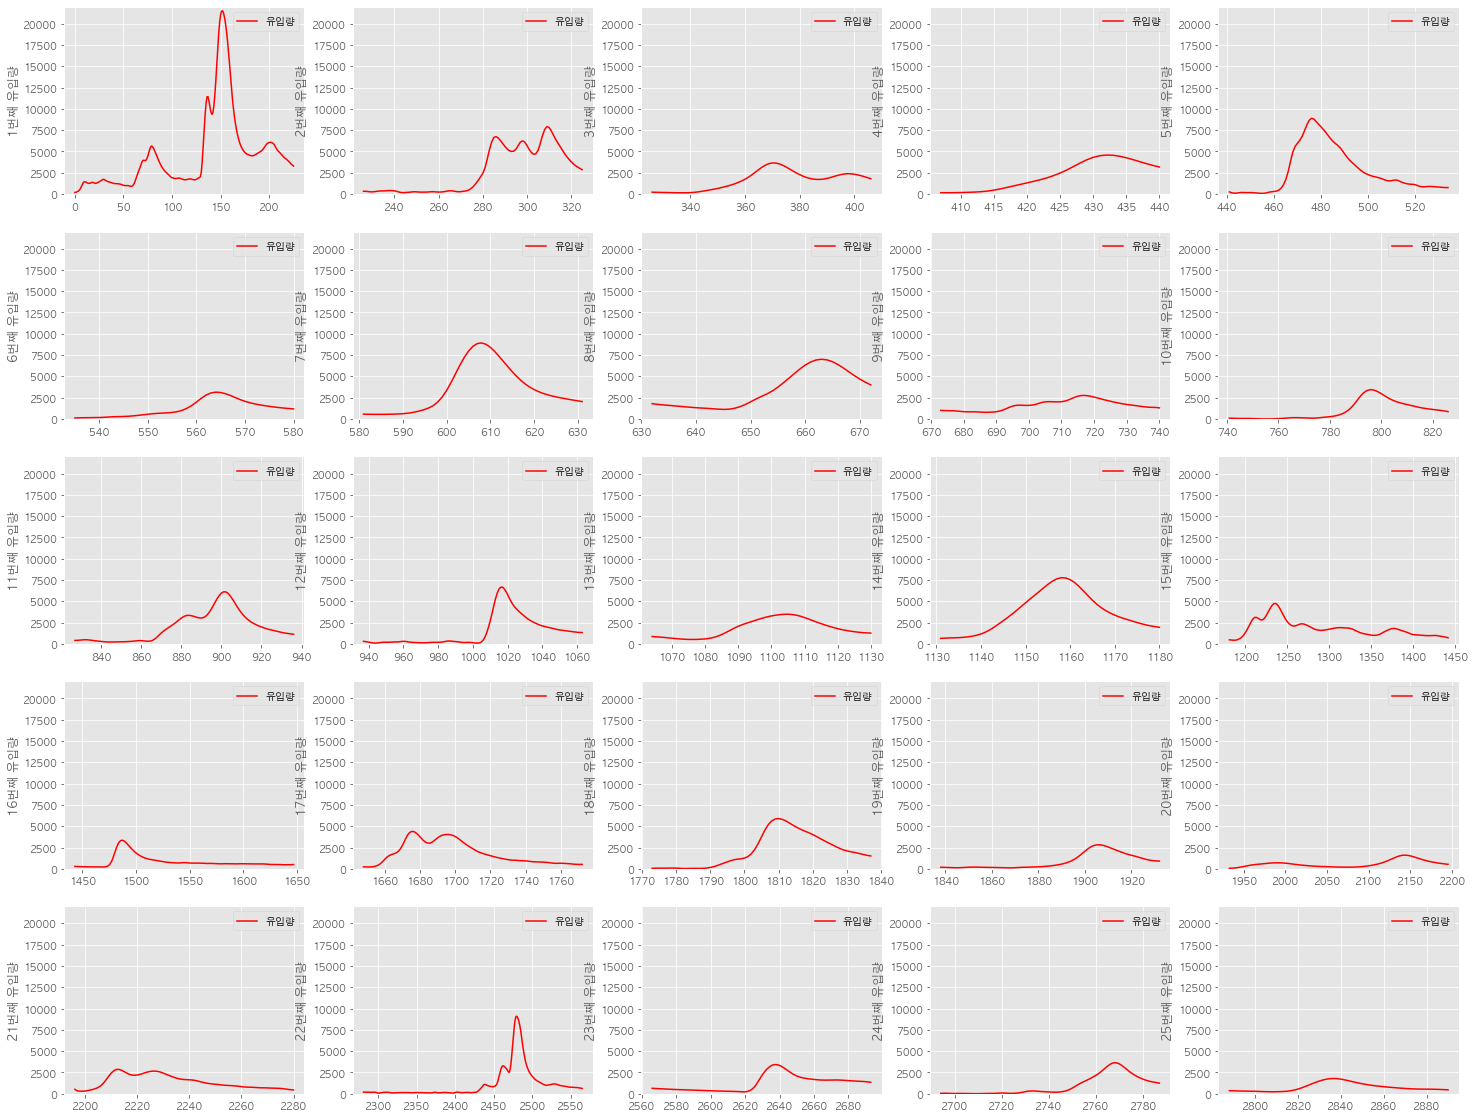

In [27]:
cnts = df['홍수사상번호'].value_counts()
tmp = pd.Series([0], index=[0])
cnts = cnts.append(tmp)
cnts = cnts.sort_index().cumsum()

# 홍수사상번호마다 유입량 분포 및 지수가중이동평균을 이용항 가중치 탐색
fig, ax = plt.subplots(5,5,figsize=(25,20))

for i in range(1,26):
    plt.subplot(5,5,i)

    flood = df['유입량'][cnts[i-1]:cnts[i]]
#     eMov = flood.ewm(span=5).mean()
#     plt.plot(eMov, linestyle='--', color='b', label = "지수가중평균")
    plt.plot(df['유입량'][cnts[i-1]:cnts[i]], color='r', label = "유입량")
    
    plt.ylabel(str(i)+"번째 유입량")
    plt.ylim(0,22000)
    plt.legend()
plt.show()

In [202]:
from tslearn.utils import to_time_series_dataset
X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

In [124]:
scaledArray = []

In [125]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

for i in range(25):
    tmp=TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform([mySeries[i]])
    scaledArray.append(tmp.reshape(-1))

In [189]:
import dtw
dtw.dtw(scaledArray[0], scaledArray[24]).distance

46.3665167039293

In [260]:
mySeries=[]
for i in range(1,26):
    flood = df['유입량'][cnts[i-1]:cnts[i]]  # 홍수사상번호별 유입량 Series
    mySeries.append(flood)

In [ ]:
myArrays=[]
for i in range(25):
    tmp = mySeries[i].to_numpy()
    myArrays.append()

In [215]:
from tslearn.utils import to_time_series_dataset

# 여기를 반복문으로 대체해야할 듯
X = to_time_series_dataset([myArrays[0],myArrays[1],myArrays[2],myArrays[3],
                            myArrays[4],myArrays[5],myArrays[6],myArrays[7],
                            myArrays[8],myArrays[9],myArrays[10],myArrays[11],
                            myArrays[12],myArrays[13],myArrays[14],myArrays[15],
                            myArrays[16],myArrays[17],myArrays[18],myArrays[19],
                            myArrays[20],myArrays[21],myArrays[22],myArrays[23],
                            myArrays[24],
                           ])

In [218]:
X.shape

(25, 285, 1)

In [219]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

X_normal = TimeSeriesScalerMeanVariance().fit_transform(X)

In [221]:
X_normal.shape

(25, 285, 1)

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


5.841 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


1.801 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


1.801 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


5.344 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


1.721 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


1.721 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


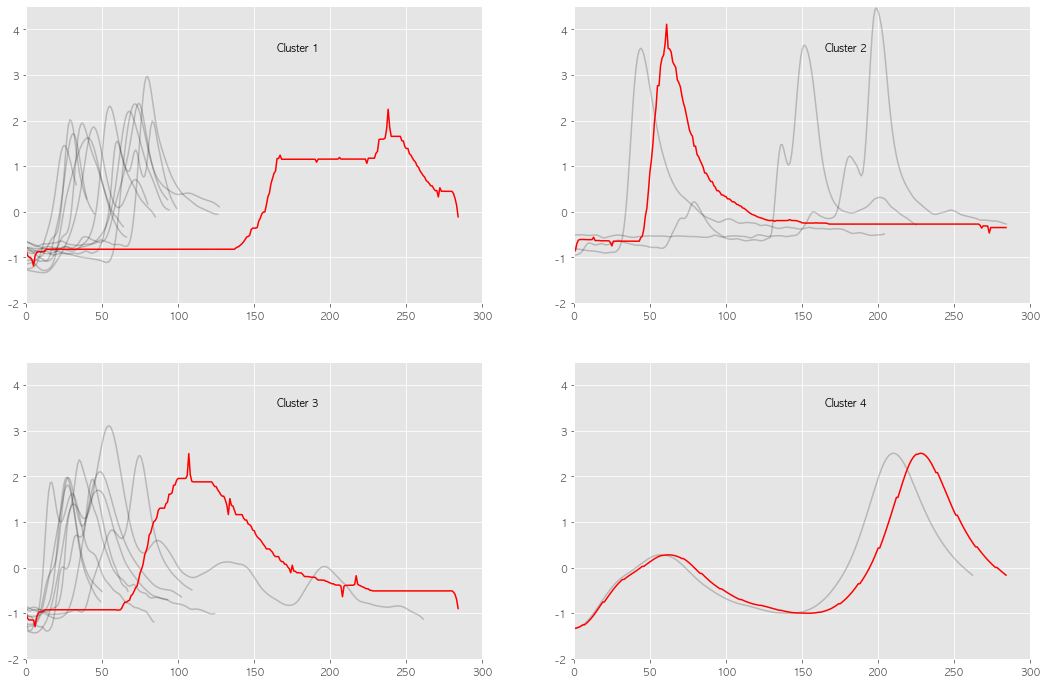

In [273]:
dba_km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(4):
    plt.subplot(2,2, 1 + yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 300)
    plt.ylim(-2,4.5)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("DBA $k$-means")

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

3.235 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


1.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


1.127 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


1.127 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


3.681 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


1.131 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.131 --> 


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


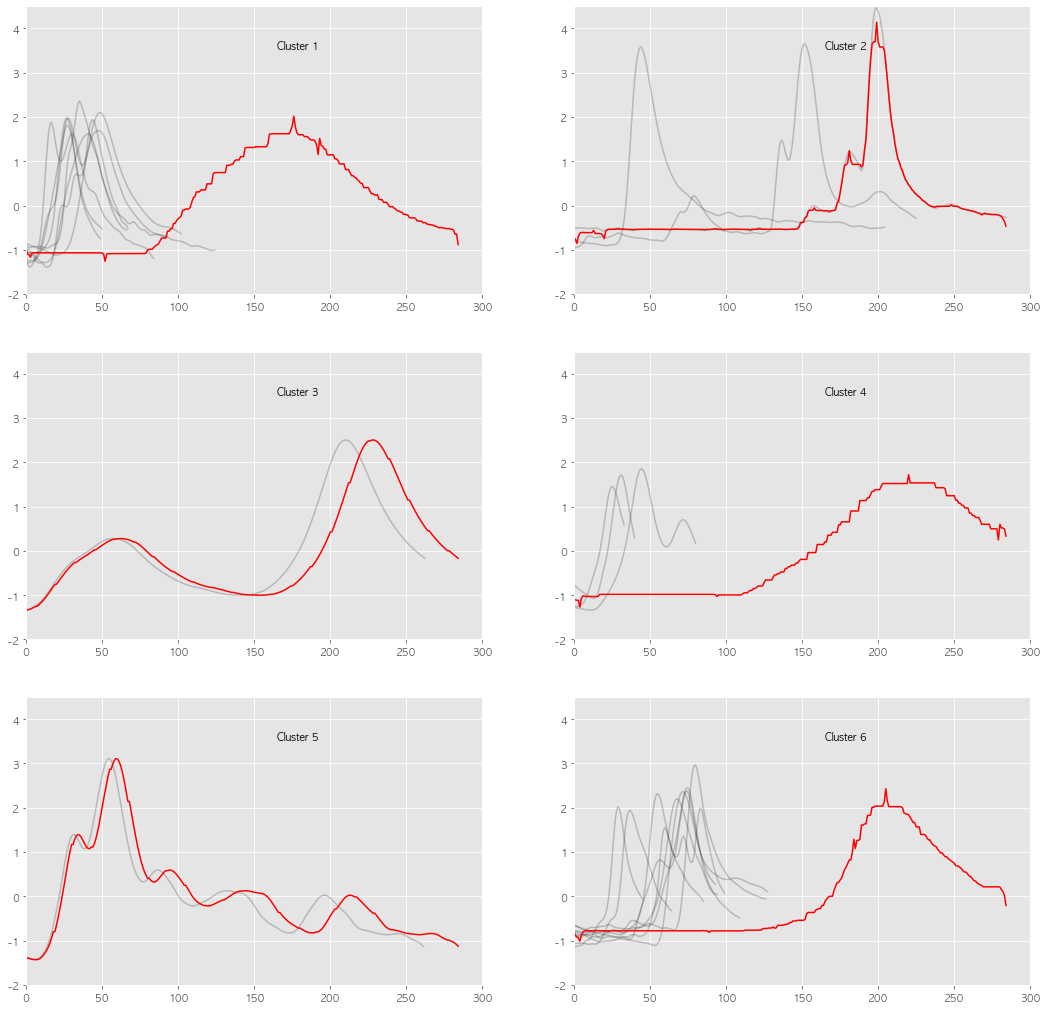

In [271]:
dba_km = TimeSeriesKMeans(n_clusters=6,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_normal)

plt.subplots(3,2,figsize=(18,18))
for yi in range(6):
    plt.subplot(3,2, 1 + yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 300)
    plt.ylim(-2,4.5)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("DBA $k$-means")

20.272 --> 1.844 --> 1.846 --> 1.846 --> 1.845 --> 1.845 --> 1.844 --> 1.845 --> 1.844 --> 1.844 --> 1.844 --> 1.844 --> 1.844 --> 1.844 --> 1.844 --> 1.844 --> 1.843 --> 1.844 --> 1.843 --> 1.843 --> 1.843 --> 1.843 --> 1.842 --> 1.843 --> 1.842 --> 1.843 --> 1.842 --> 1.843 --> 1.842 --> 1.842 --> 1.841 --> 1.842 --> 1.841 --> 1.842 --> 1.841 --> 1.841 --> 1.841 --> 1.841 --> 1.841 --> 1.841 --> 1.840 --> 1.841 --> 1.840 --> 1.841 --> 1.840 --> 1.841 --> 1.840 --> 1.840 --> 1.840 --> 1.840 --> 


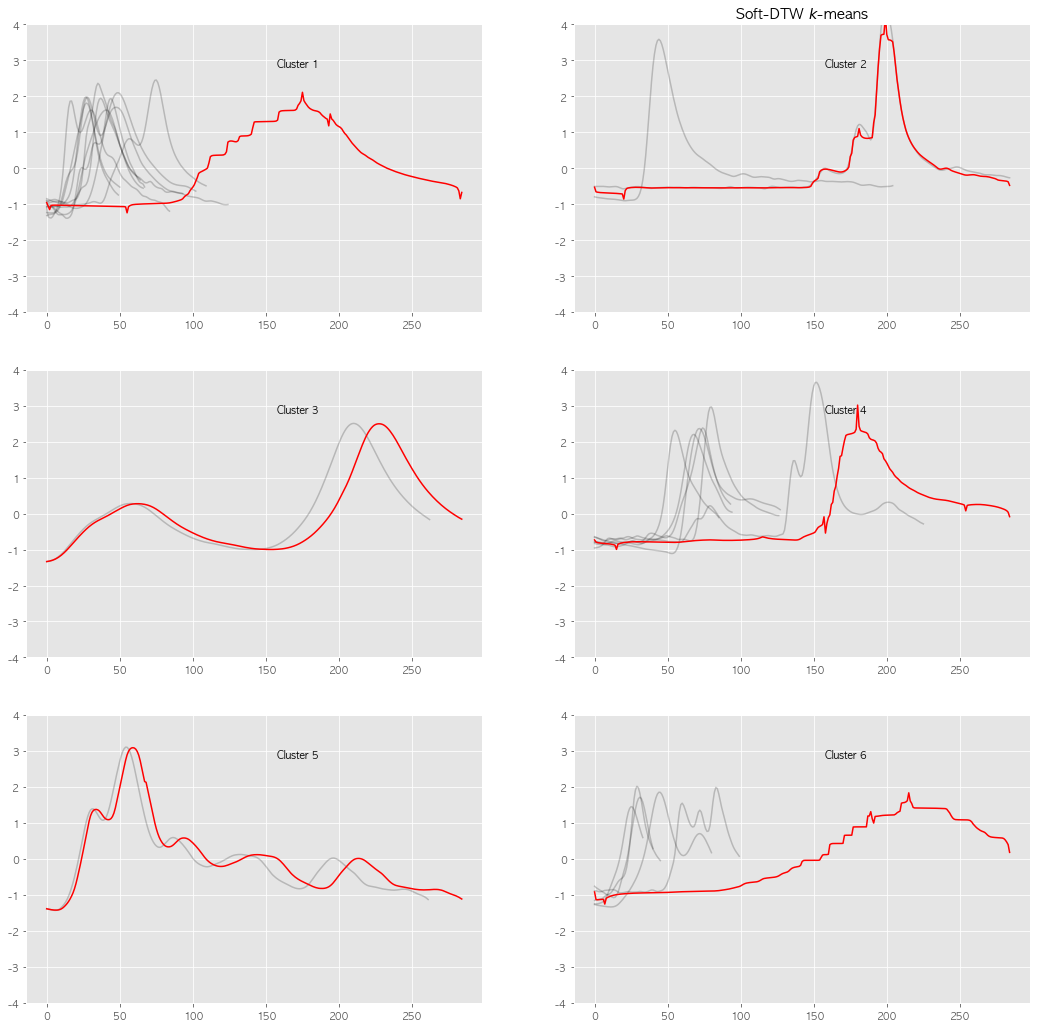

In [270]:
sdtw_km = TimeSeriesKMeans(n_clusters=6,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(3,2,figsize=(18,18))
for yi in range(6):
    plt.subplot(3,2, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

In [266]:
myArrays[0].shape

(226,)

In [265]:
X2.shape

(2, 226, 1)

In [267]:
X2 = to_time_series_dataset([myArrays[0],myArrays[1]])
for i in range(2,25):
    X2 = to_time_series_dataset([myArrays[i] for i in range(25)])


In [ ]:
mySeries=[]
for i in range(1,26):
    flood = df['유입량'][cnts[i-1]:cnts[i]]  # 홍수사상번호별 유입량 Series
    mySeries.append(flood)
    
myArrays=[]
for i in range(25):
    tmp = mySeries[i].to_numpy()
    myArrays.append()
    

######
from tslearn.utils import to_time_series_dataset

# 여기를 반복문으로 대체해야할 듯
X = to_time_series_dataset([myArrays[i] for i in range(25)])

######
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

X_normal = TimeSeriesScalerMeanVariance().fit_transform(X)

###### DTW(DBA)
dba_km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(4):
    plt.subplot(2,2, 1 + yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 300)
    plt.ylim(-2,4.5)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("DBA $k$-means")


###### soft-DTW
sdtw_km = TimeSeriesKMeans(n_clusters=4,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_normal)

plt.subplots(2,2,figsize=(18,12))
for yi in range(4):
    plt.subplot(2,2, 1+yi)
    for xx in X_normal[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")